In [48]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [49]:
df = pd.read_csv("cumulative.csv", encoding = "utf-8")
df = df.drop(columns=["rowid", "kepid", "kepoi_name", "kepler_name", "koi_pdisposition", "koi_score", "koi_tce_delivname"])
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [50]:
X_columns=list(df.columns)
X_columns.remove("koi_disposition")
X

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
5,0,0,0,0,11.094321,2.036000e-05,-2.036000e-05,171.201160,0.001410,-0.001410,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,0,0,0,0,4.134435,1.046000e-05,-1.046000e-05,172.979370,0.001900,-0.001900,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
7,0,0,0,0,2.566589,1.781000e-05,-1.781000e-05,179.554370,0.004610,-0.004610,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
8,0,1,1,0,7.361790,2.128000e-05,-2.128000e-05,132.250530,0.002530,-0.002530,...,-124.0,3.986,0.182,-0.098,1.958,0.322,-0.483,298.86435,42.151569,12.660
9,0,0,0,0,16.068647,1.088000e-05,-1.088000e-05,173.621937,0.000517,-0.000517,...,-83.0,4.485,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841


# Create a Train Test Split
Use `koi_disposition` for the y values

In [51]:
# Split data into training and testing
X = df[['koi_fpflag_co',
 'koi_fpflag_nt',
 'koi_fpflag_ss',
 'koi_model_snr',
 'koi_prad',
 'koi_prad_err2',
 'koi_duration_err2',
 'koi_fpflag_ec',
 'koi_duration_err1',
 'koi_prad_err1',
 'koi_steff_err1',
 'koi_depth',
 'koi_steff_err2',
 'koi_time0bk_err1',
 'koi_duration',
 'koi_time0bk_err2',
 'koi_impact',
 'koi_period',
 'koi_period_err1',
 'koi_period_err2',
 'koi_insol_err1',
 'koi_teq',
 'koi_depth_err2',
 'koi_insol_err2',
 'koi_time0bk',
 'koi_insol',
 'koi_depth_err1',
 'ra',
 'koi_impact_err1',
 'koi_srad_err1',
 'dec',
 'koi_impact_err2',
 'koi_kepmag']]
y = df["koi_disposition"].values.reshape(-1, 1)
print(X.shape, y.shape)

(8744, 33) (8744, 1)


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [53]:
X_train.head()

,koi_fpflag_co,koi_fpflag_nt,koi_fpflag_ss,koi_model_snr,koi_prad,koi_prad_err2,koi_duration_err2,koi_fpflag_ec,koi_duration_err1,koi_prad_err1,...,koi_insol_err2,koi_time0bk,koi_insol,koi_depth_err1,ra,koi_impact_err1,koi_srad_err1,dec,koi_impact_err2,koi_kepmag
6274,0,0,0,11.6,1.80,-0.17,-0.60400,0,0.60400,0.74,...,-0.15,520.860000,0.59,42.4,292.13519,0.2033,0.383,38.926491,-0.2257,13.465
3541,0,0,0,31.2,2.91,-0.21,-0.08470,0,0.08470,0.38,...,-2.27,169.542270,11.09,24.9,290.67313,0.0550,0.122,38.691010,-0.5990,13.597
8659,0,1,0,6.2,2.08,-0.23,-4.20000,0,4.20000,0.80,...,-0.31,460.488400,0.99,191.0,292.10245,0.3973,0.370,37.566910,-0.1063,15.107
4851,0,0,1,1256.8,61.81,-5.78,-0.00397,0,0.00397,18.36,...,-11.85,147.207512,43.71,414.0,287.63705,0.0070,0.251,42.530819,-0.0080,15.511
1387,0,0,0,36.4,1.15,-0.12,-0.05800,0,0.05800,0.09,...,-12.09,131.881400,42.62,13.7,295.90656,0.4150,0.045,45.809120,-0.0210,14.744


# Pre-processing

Scale the data using the MinMaxScaler

In [54]:

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Train the Support Vector Machine

In [55]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [56]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8571210734980177
Testing Data Score: 0.8554437328453797


# Hyperparameter Tuning

Use `GridSearchCV` to tune the `C` and `gamma` parameters

In [57]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [58]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1, gamma=0.0001, score=0.8472095150960659, total=   1.9s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1, gamma=0.0001, score=0.8554437328453797, total=   2.1s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.3s remaining:    0.0s
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1, gamma=0.0001, score=0.8508691674290942, total=   2.3s
[CV] C=1, gamma=0.001 ................................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=1, gamma=0.001, score=0.8472095150960659, total=   2.1s
[CV] C=1, gamma=0.001 ................................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=1, gamma=0.001, score=0.8554437328453797, total=   2.2s
[CV] C=1, gamma=0.001 ................................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=1, gamma=0.001, score=0.8508691674290942, total=   2.3s
[CV] C=1, gamma=0.01 .................................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=1, gamma=0.01, score=0.8472095150960659, total=   2.3s
[CV] C=1, gamma=0.01 .................................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=1, gamma=0.01, score=0.8554437328453797, total=   2.4s
[CV] C=1, gamma=0.01 .................................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=1, gamma=0.01, score=0.8508691674290942, total=   2.5s
[CV] C=5, gamma=0.0001 ...............................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=5, gamma=0.0001, score=0.8613906678865508, total=   2.4s
[CV] C=5, gamma=0.0001 ...............................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=5, gamma=0.0001, score=0.8728270814272644, total=   2.4s
[CV] C=5, gamma=0.0001 ...............................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=5, gamma=0.0001, score=0.8709972552607502, total=   2.4s
[CV] C=5, gamma=0.001 ................................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=5, gamma=0.001, score=0.8613906678865508, total=   2.4s
[CV] C=5, gamma=0.001 ................................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=5, gamma=0.001, score=0.8728270814272644, total=   2.0s
[CV] C=5, gamma=0.001 ................................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=5, gamma=0.001, score=0.8709972552607502, total=   2.4s
[CV] C=5, gamma=0.01 .................................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=5, gamma=0.01, score=0.8613906678865508, total=   2.5s
[CV] C=5, gamma=0.01 .................................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=5, gamma=0.01, score=0.8728270814272644, total=   2.2s
[CV] C=5, gamma=0.01 .................................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=5, gamma=0.01, score=0.8709972552607502, total=   2.1s
[CV] C=10, gamma=0.0001 ..............................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=10, gamma=0.0001, score=0.8668801463860933, total=   2.2s
[CV] C=10, gamma=0.0001 ..............................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=10, gamma=0.0001, score=0.8815187557182068, total=   2.0s
[CV] C=10, gamma=0.0001 ..............................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=10, gamma=0.0001, score=0.8774016468435498, total=   2.4s
[CV] C=10, gamma=0.001 ...............................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=10, gamma=0.001, score=0.8668801463860933, total=   2.2s
[CV] C=10, gamma=0.001 ...............................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=10, gamma=0.001, score=0.8815187557182068, total=   2.2s
[CV] C=10, gamma=0.001 ...............................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=10, gamma=0.001, score=0.8774016468435498, total=   2.6s
[CV] C=10, gamma=0.01 ................................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10, gamma=0.01, score=0.8668801463860933, total=   2.5s
[CV] C=10, gamma=0.01 ................................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10, gamma=0.01, score=0.8815187557182068, total=   2.2s
[CV] C=10, gamma=0.01 ................................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10, gamma=0.01, score=0.8774016468435498, total=   2.4s


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  1.5min finished
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [59]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'gamma': 0.0001}
0.8752668496492834


In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.8902104300091491

In [44]:
feature_names=X.columns
importantDict=sorted(zip(rf.feature_importances_, feature_names), reverse=True)
importantDict

[(0.10685427915772226, 'koi_fpflag_co'),
 (0.10244529580570466, 'koi_fpflag_nt'),
 (0.06172128523781662, 'koi_fpflag_ss'),
 (0.05459797075316533, 'koi_model_snr'),
 (0.050859385589808875, 'koi_prad'),
 (0.03548530243507395, 'koi_prad_err2'),
 (0.03459281608618809, 'koi_duration_err2'),
 (0.03415152516737483, 'koi_fpflag_ec'),
 (0.03377782408014256, 'koi_duration_err1'),
 (0.030917135866568354, 'koi_prad_err1'),
 (0.029786961879305626, 'koi_steff_err1'),
 (0.027905529850389296, 'koi_depth'),
 (0.02679920119853547, 'koi_steff_err2'),
 (0.026483179831038494, 'koi_time0bk_err1'),
 (0.024555634707295666, 'koi_duration'),
 (0.022735274114744793, 'koi_time0bk_err2'),
 (0.021095616227458036, 'koi_impact'),
 (0.020787679327863285, 'koi_period'),
 (0.01839479409846778, 'koi_period_err1'),
 (0.017252577333808215, 'koi_period_err2'),
 (0.016452135222354346, 'koi_insol_err1'),
 (0.01524590349747535, 'koi_teq'),
 (0.013553470455249763, 'koi_depth_err2'),
 (0.013128377477261048, 'koi_insol_err2'),
 (

In [45]:
importantColumns = [x[1] for x in importantDict if x[0] >= 0.01]
importantColumns 

['koi_fpflag_co',
 'koi_fpflag_nt',
 'koi_fpflag_ss',
 'koi_model_snr',
 'koi_prad',
 'koi_prad_err2',
 'koi_duration_err2',
 'koi_fpflag_ec',
 'koi_duration_err1',
 'koi_prad_err1',
 'koi_steff_err1',
 'koi_depth',
 'koi_steff_err2',
 'koi_time0bk_err1',
 'koi_duration',
 'koi_time0bk_err2',
 'koi_impact',
 'koi_period',
 'koi_period_err1',
 'koi_period_err2',
 'koi_insol_err1',
 'koi_teq',
 'koi_depth_err2',
 'koi_insol_err2',
 'koi_time0bk',
 'koi_insol',
 'koi_depth_err1',
 'ra',
 'koi_impact_err1',
 'koi_srad_err1',
 'dec',
 'koi_impact_err2',
 'koi_kepmag']

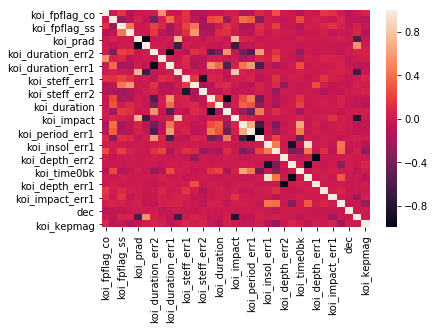

In [60]:
import seaborn as sns
corr = X_train.corr()

# plot the heatmap
sns.heatmap(corr)